In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import my_alg
%matplotlib

Using matplotlib backend: Qt5Agg


In [3]:
# define loss function
def ave_cross_en( y_true, y_pred):
    loss = ( keras.losses.kullback_leibler_divergence( y_true, y_pred) +  keras.losses.kld( 1 - y_true, 1- y_pred))
    return loss

In [24]:
# load dataset
mnist_x = np.load('./neuron_Guo/ref_imgs.npy')
mnist_b = np.load('./neuron_Guo/ccm_imgs.npy')


In [29]:
# check shape of dataset
mnist_x.shape, mnist_b.shape

((15909, 128, 128), (15909, 128, 128))

In [30]:
# expand dimension of dataset to fit model
mnist_b = np.expand_dims( mnist_b, axis=3)
mnist_x = np.expand_dims( mnist_x, axis=3)

In [31]:
mnist_x.shape, mnist_b.shape

((15909, 128, 128, 1), (15909, 128, 128, 1))

In [32]:
# define random function to seprate dataset into train data, eval data and test data, randomly
np.random.seed(47)
arg_random = np.random.permutation( len( mnist_b))

In [33]:
# seprate dataset into train data, eval data and test data, randomly
NUM_TRAIN = int( 0.9 * len( mnist_x))
x_train = mnist_x[ arg_random[:NUM_TRAIN-1000]]
b_train = mnist_b[arg_random[:NUM_TRAIN-1000]]

x_eval = mnist_x[ arg_random[NUM_TRAIN-1000:NUM_TRAIN]]
b_eval = mnist_b[ arg_random[NUM_TRAIN-1000:NUM_TRAIN]]

x_test = mnist_x[ arg_random[NUM_TRAIN:]]
b_test = mnist_b[ arg_random[NUM_TRAIN:]]


'\nNUM_TRAIN = 8725\nx_train = mnist_x[:NUM_TRAIN]\nb_train = mnist_b[:NUM_TRAIN]\n\nx_test = mnist_x [NUM_TRAIN:]\nb_test = mnist_b [NUM_TRAIN:]\n'

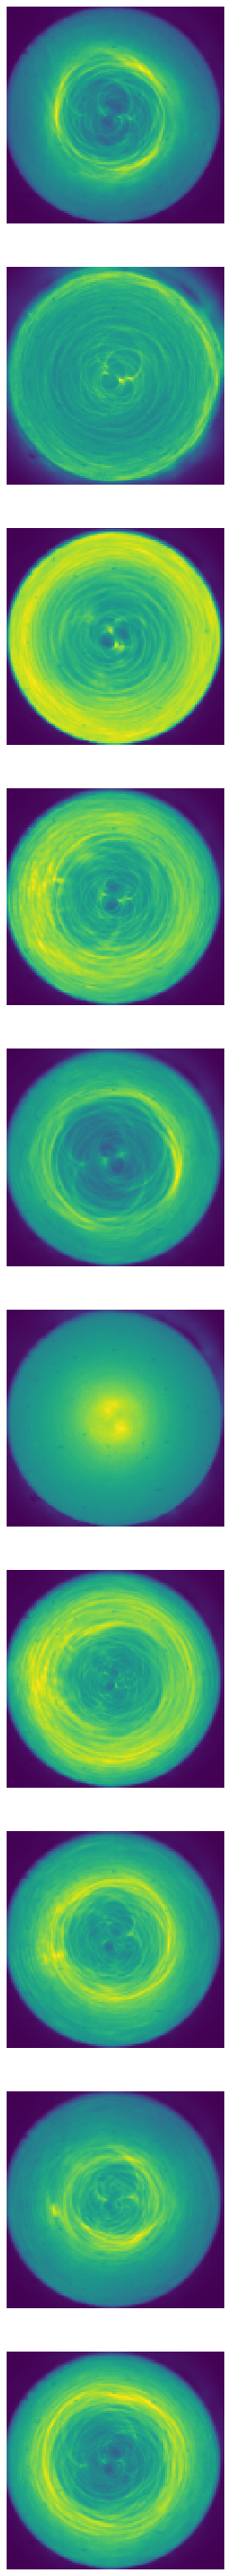

In [34]:
fig = my_alg.show_random_sampels( b_train,10,1,idx = range(10))

In [35]:
# define model and compile it
model = my_alg.build_model_128()
model.compile(optimizer=keras.optimizers.Adam(1e-3, amsgrad= True), loss=ave_cross_en, metrics=['mae'])

In [36]:
# train model: set batch_size and epochs
model.fit(b_train, x_train, batch_size=16, epochs=17, verbose=1,validation_data= ( b_eval, x_eval))

Train on 14318 samples, validate on 1591 samples
Epoch 1/20
14318/14318 [==============================] - 84s 6ms/sample - loss: 0.0439 - mean_absolute_error: 0.0361 - val_loss: 0.0130 - val_mean_absolute_error: 0.0072
Epoch 2/20
14318/14318 [==============================] - 81s 6ms/sample - loss: 0.0064 - mean_absolute_error: 0.0062 - val_loss: 0.0051 - val_mean_absolute_error: 0.0049
Epoch 3/20
14318/14318 [==============================] - 81s 6ms/sample - loss: 0.0044 - mean_absolute_error: 0.0049 - val_loss: 0.0042 - val_mean_absolute_error: 0.0051
Epoch 4/20
14318/14318 [==============================] - 81s 6ms/sample - loss: 0.0034 - mean_absolute_error: 0.0043 - val_loss: 0.0035 - val_mean_absolute_error: 0.0042
Epoch 5/20
14318/14318 [==============================] - 81s 6ms/sample - loss: 0.0028 - mean_absolute_error: 0.0038 - val_loss: 0.0034 - val_mean_absolute_error: 0.0039
Epoch 6/20
14318/14318 [==============================] - 82s 6ms/sample - loss: 0.0024 - mean_a

In [38]:
# predict train data
train_pred = model.predict( b_train)

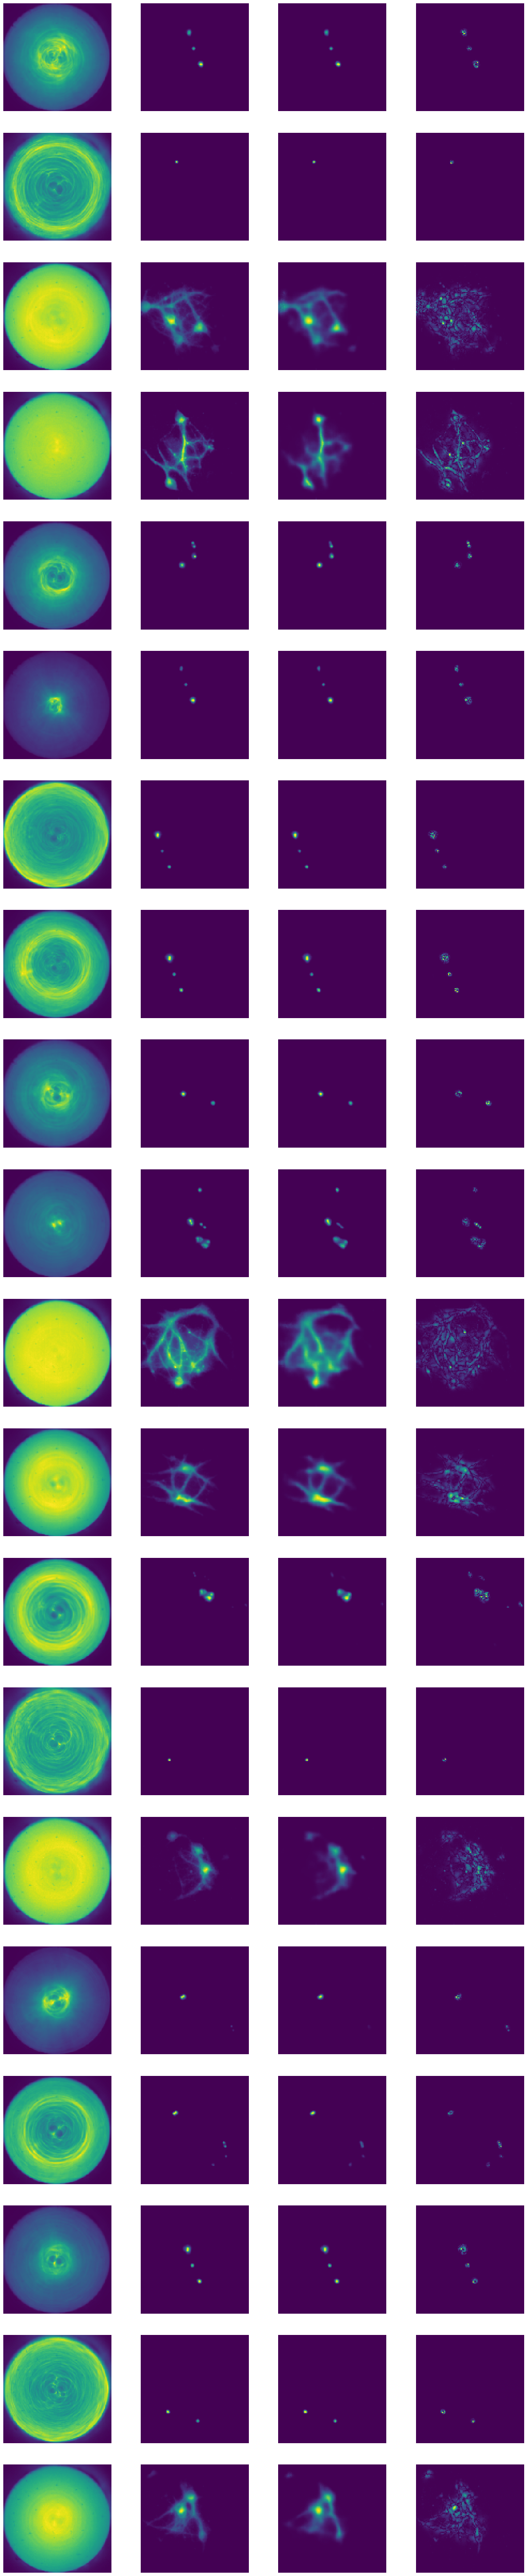

In [40]:
train_fig = my_alg.show_some_results( b_train, x_train, train_pred,20)

In [41]:
# predict test data
test_pred = model.predict( b_test)

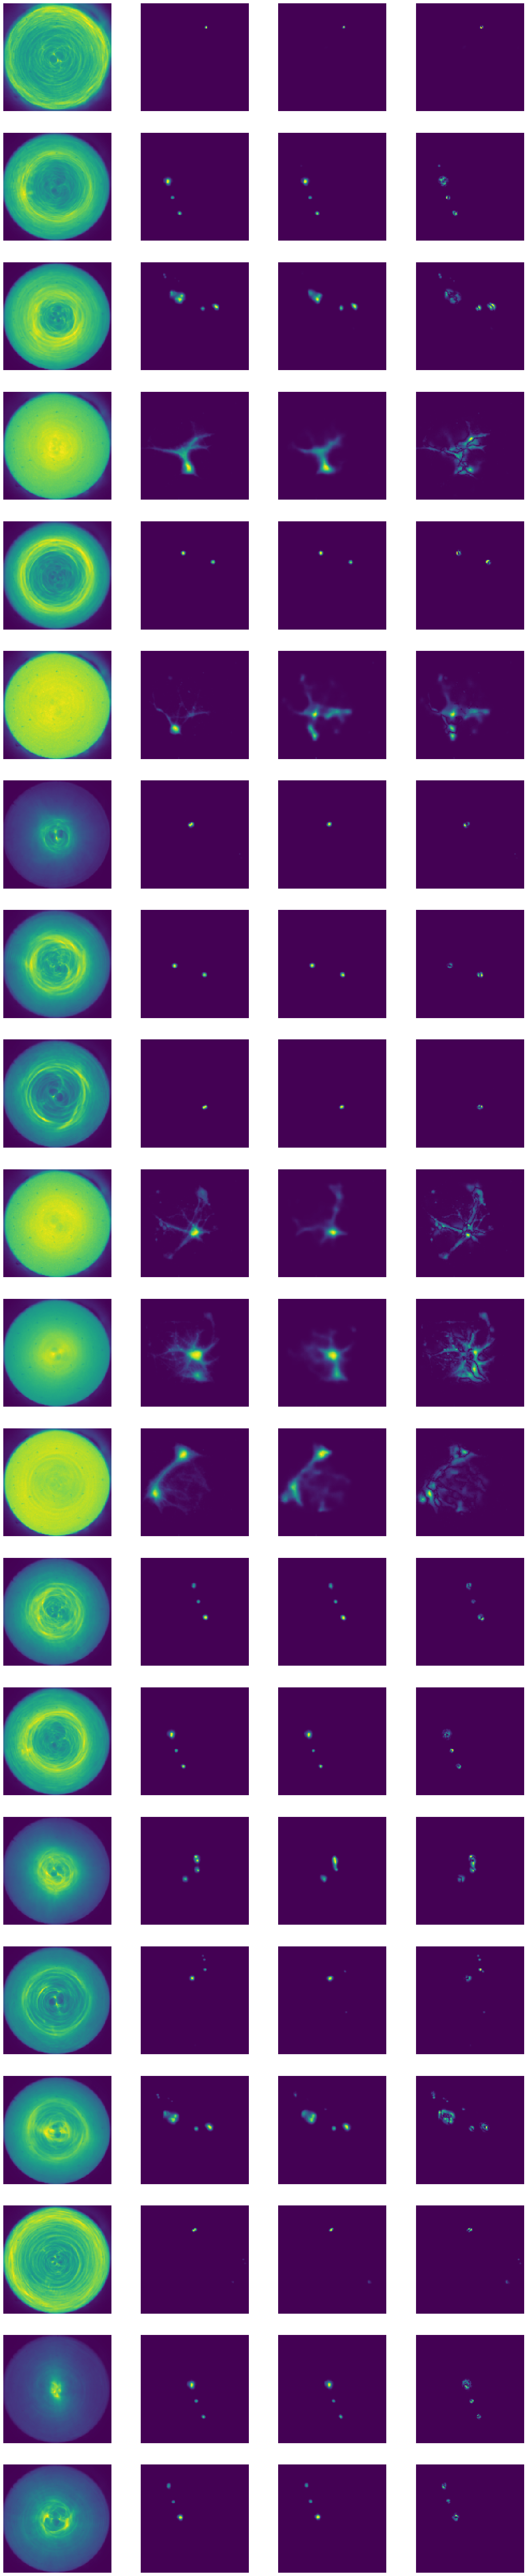

In [43]:
test_fig = my_alg.show_some_results( b_test, x_test, test_pred,20, img_size=5)